# COS60008 Introduction to Data Science
## Assignment 3_3, 2024, 1st semester
## Student Details:
* Name: Mahesh Pandey
* Student ID: 105108938
* Email: 105108938@student.swin.edu.au
* Submission Date: 2024-6-6
* Tutelab Class: Monday 8:30

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data set
wholesale_customer_data =pd.read_csv('Wholesale customers data.csv')

In [3]:
wholesale_customer_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
'''
Checking for data
'''
print(wholesale_customer_data.shape)
print(wholesale_customer_data.info())
print(wholesale_customer_data.index)
print('\033[1m','\nFirst three data:','\033[0m') # '\033[1m' genertates bold string in terminal output
print(wholesale_customer_data.head(3))
print('\033[1m','\nLast three data:','\033[0m')
print(wholesale_customer_data.tail(3))
print('\033[1m','\nDescribing Data:','\033[0m')
print(wholesale_customer_data.describe())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
RangeIndex(start=0, stop=440, step=1)
 
First three data: 
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
 
Last three data:

In [5]:
# Numeric columns
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Categorical columns
cat_columns = ['Channel', 'Region']

print("Numeric columns:", numeric_columns)
print("Categorical columns:", cat_columns)

Numeric columns: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Categorical columns: ['Channel', 'Region']


In [6]:
# Converting categorical column into object type for analysis
wholesale_customer_data[cat_columns] = wholesale_customer_data[cat_columns].astype(object)

## Data Cleaning

In [7]:
# Cleaning missing value
def clean_missing_value(data):
      # Check for missing values
    missing_values = data.isnull().sum()
    print("Missing Value\n",missing_values)

    # Remove rows or columns with more than 50% missing values
    rows_to_drop = missing_values[missing_values > 0.5 * len(data)].index
    print("rows to drop",rows_to_drop) # no rows has 50% miswsing values
    data.drop(columns=rows_to_drop, inplace=True)  # Drop columns with more than 50% missing values

    # For columns with less than 50% missing values
    # Fill missing numerical values with mean
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = data[numerical_cols].fillna(wholesale_customer_data[numerical_cols].mean())
    
    # For categorical columns, Fill missing values with the mode (most frequent value)
    categorical_cols = data.select_dtypes(include=['object']).columns
    print(categorical_cols)
    data[categorical_cols] = data[categorical_cols].fillna(wholesale_customer_data[categorical_cols].mode().iloc[0])
    
    # Convert back to object data type
    data[categorical_cols] = data[categorical_cols].astype('object')
    
    return data

In [8]:
# Handling duplicates
def handle_duplicates(data):
    # Check for duplicates
    duplicates = data.duplicated().sum()
    print('\033[1m','\nNo of Duplicate Data:','\033[0m', duplicates)  
    
    # Drop duplicates
    data = data.drop_duplicates()
    print("data info")
    print(data.info())
    return data

In [9]:
'''
Main function to clean data set.
'''
def clean_data(data):
    
    # Check for missing values
    data = clean_missing_value(data)
    
    # Handle duplicates
    data = handle_duplicates(data)
    return data
refine_wholesale_customer_data = clean_data(wholesale_customer_data)

Missing Value
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
rows to drop Index([], dtype='object')
Index(['Channel', 'Region'], dtype='object')
 
No of Duplicate Data:  0
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicassen        440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


## Task 3 - Extension

### 3.1 Using clustering algorithm
##### For the Task3, K-means clustering algorithm is used to determine the clusters in the dataset.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\mahes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


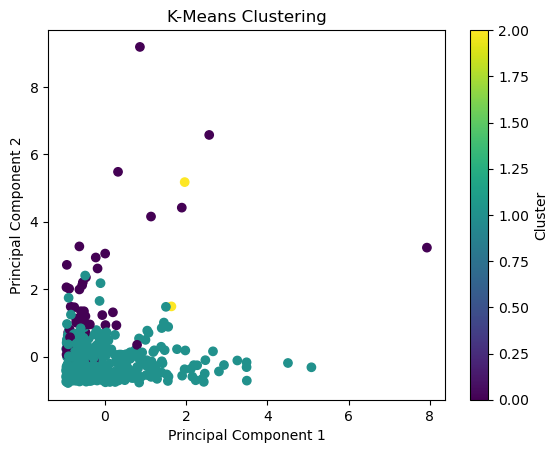

In [11]:
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set the number of threads for parallel processing
os.environ["OMP_NUM_THREADS"] = "2"


# Drop categorical features for clustering
X_clustering = refine_wholesale_customer_data.drop(columns=['Region', 'Channel'])

# Standardize the features
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init to suppress the warning
cluster_labels = kmeans.fit_predict(X_clustering_scaled)

# Visualize the clusters (using only the first two principal components for simplicity)
plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


#### Result:

The x-axis represents the first principal component, and the y-axis represents the second principal component. These components are the result of a dimensionality reduction technique (PCA).Each color represents a different cluster, and the colors are assigned based on the cluster labels

The plot shows three distinct clusters, each marked with a different color.
* Cluster 0, represented by green color, appears to be the largest group of points concentrated towards the lower values of both principal components.
* Cluster 1, represented by purple color, is scattered more widely across the plot, with points spreading out more than in Cluster 0.
* Cluster 2, represented by yellow color, is the smallest and contains a few isolated points that are distinct from the other clusters.


### 3.2 In task 1.3, we predicated the chanel value for classification model, whereas in this task we are predicating the region, making region as the target variable with K-NN and ANN model.

Best parameters for K-NN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy (K-NN with best hyperparameters): 0.82
Precision (K-NN with best hyperparameters): 0.28
Confusion Matrix (K-NN with best hyperparameters):
 [[ 0  0  9]
 [ 0  0  5]
 [ 2  0 72]]
Best parameters for ANN: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Accuracy (ANN with best hyperparameters): 1.00
Precision (ANN with best hyperparameters): 1.00
Confusion Matrix (ANN with best hyperparameters):
 [[ 9  0  0]
 [ 0  5  0]
 [ 0  0 74]]

Comparison of Models:
  Model  Accuracy  Precision
0  K-NN  0.818182    0.27907
1   ANN  1.000000    1.00000


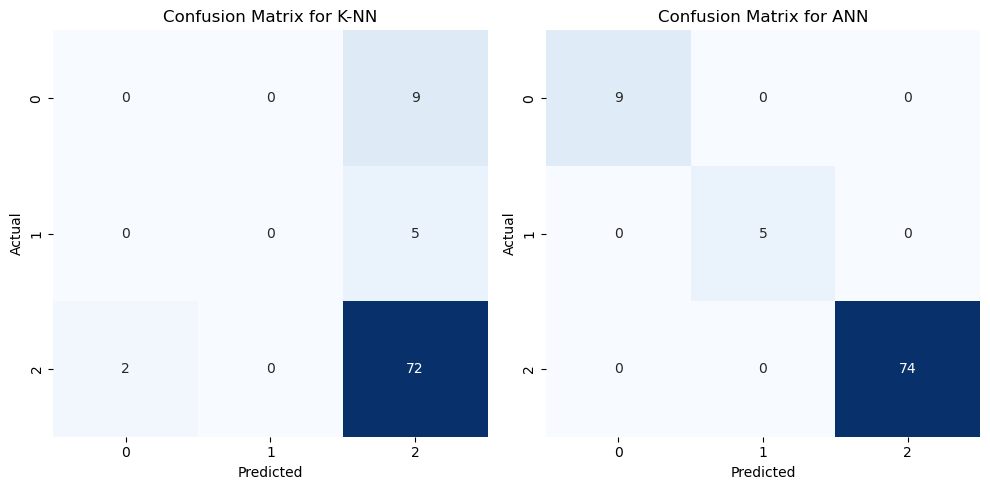

In [12]:
# Converting categorical labels to integer classes
label_encoder = LabelEncoder()
refine_wholesale_customer_data['Region'] = label_encoder.fit_transform(refine_wholesale_customer_data['Region'])

# Droping irrelevant columns
X = refine_wholesale_customer_data.drop(columns=['Channel'])  # Assuming 'Channel' is not relevant
y = refine_wholesale_customer_data['Region']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Hyperparameter Tuning for K-Nearest Neighbors (K-NN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

print("Best parameters for K-NN:", grid_search_knn.best_params_)

# Step 3: Modeling Training with Best Hyperparameters for K-NN
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)

# Step 4: Model Evaluation for K-NN
y_pred_knn = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Accuracy (K-NN with best hyperparameters): {:.2f}".format(accuracy_knn))
print("Precision (K-NN with best hyperparameters): {:.2f}".format(precision_knn))
print("Confusion Matrix (K-NN with best hyperparameters):\n", conf_matrix_knn)

# Step 5: Hyperparameter Tuning for Artificial Neural Network (ANN)
param_grid_ann = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]  # Increase the maximum number of iterations
}

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search_ann = GridSearchCV(estimator=MLPClassifier(random_state=42),
                               param_grid=param_grid_ann,
                               scoring='accuracy',
                               cv=5,
                               n_jobs=-1)

grid_search_ann.fit(X_train_scaled, y_train)

print("Best parameters for ANN:", grid_search_ann.best_params_)

# Step 6: Modeling Training with Best Hyperparameters for ANN
best_ann_model = grid_search_ann.best_estimator_
best_ann_model.fit(X_train_scaled, y_train)

# Step 7: Modeling Evaluation for ANN
y_pred_ann = best_ann_model.predict(X_test_scaled)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, average='macro', zero_division=0)
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

print("Accuracy (ANN with best hyperparameters): {:.2f}".format(accuracy_ann))
print("Precision (ANN with best hyperparameters): {:.2f}".format(precision_ann))
print("Confusion Matrix (ANN with best hyperparameters):\n", conf_matrix_ann)

# Step 8: Comparison
comparison_df = pd.DataFrame({
    'Model': ['K-NN', 'ANN'],
    'Accuracy': [accuracy_knn, accuracy_ann],
    'Precision': [precision_knn, precision_ann]
})

print("\nComparison of Models:")
print(comparison_df)

# Plot confusion matrix for K-NN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for K-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot confusion matrix for ANN
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Therefore, here as well for predicting region, ANN is best suited for the wholesale customer dataset.